## K-Means Clustering Algorithm Implementation

> K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

>It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:
* Determines the best value for K center points or centroids by an iterative process.

* Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

The working of the K-Means algorithm is explained in the below steps:

- Step-1: Select the number K to decide the number of clusters.

- Step-2: Select random K points or centroids. (It can be other from the input dataset).

- Step-3: Assign each data point to their closest centroid, which will form the predefined K clusters.

- Step-4: Calculate the variance and place a new centroid of each cluster.

- Step-5: Repeat the third steps, which means reassign each datapoint to the new closest centroid of each cluster.

- Step-6: If any reassignment occurs, then go to step-4 else go to FINISH.

- Step-7: The model is ready.

> Here, All the step perform by 'sklearn' tool. We just have to ready the dataset.


#### Now import necessary library

In [169]:
import pandas as pd
import seaborn

#### Now read the dataset from file using pandas

> Here we use the 'Mall Customers' dataset that I take from 'kaggle'

In [170]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


> Now Rename the table column name for the easy to access.



In [171]:
dataset.rename(columns={"Annual Income (k$)": 'income',"Spending Score (1-100)": "score"},inplace=True)
dataset

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Check the Missing value and fill it

In [172]:
dataset.isnull().any()

CustomerID    False
Gender        False
Age           False
income        False
score         False
dtype: bool

In [173]:
# or
dataset.isnull().sum()

CustomerID    0
Gender        0
Age           0
income        0
score         0
dtype: int64

> There are no missing value so, we don't need to handle it.

### Now We draw the pairplot for the visualisation.

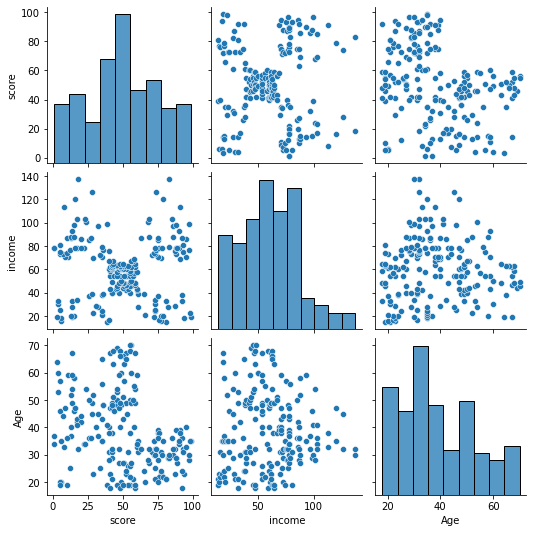

In [174]:
seaborn.pairplot(dataset[{"Age",'income','score'}])


> We can understand by looking at the plot, how many clusters we need.

> i.e. see the 'score vs income' plot may be 5 clusters are there.

> i.e. see the 'score vs Age' plot may be 3 clusters are there.

### Now import "sklearn.cluster" for K-mean Clustering and create an object

In [175]:
import sklearn.cluster as cluster
# For score vs income'
k_mean = cluster.KMeans(n_clusters=5)
k_mean.fit(dataset[["score","income"]])

KMeans(n_clusters=5)

In [176]:
# See the Centroid's values
k_mean.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783]])

> Create a separate column income_cluster in main dataset

In [177]:
dataset["income_cluster"] = k_mean.labels_
dataset

,CustomerID,Gender,Age,income,score,income_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1


In [178]:
dataset.income_cluster.value_counts()

0    81
3    39
1    35
4    23
2    22
Name: income_cluster, dtype: int64

### Now Draw a ScatterPlot with respect to "income_cluster"

<AxesSubplot:xlabel='income', ylabel='score'>

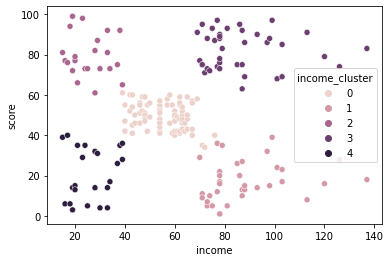

In [179]:
seaborn.scatterplot(x='income',y="score",hue='income_cluster', data=dataset)



##### You're seeing 5 different clusters with different colors.

#### Now we perform another k-mean clustering for 'score vs Age'

In [180]:
k_mean = cluster.KMeans(n_clusters=2)
k_mean.fit(dataset[["score","Age"]])
dataset["Age_cluster"] = k_mean.labels_
dataset

,CustomerID,Gender,Age,income,score,income_cluster,Age_cluster
0,1,Male,19,15,39,4,1
1,2,Male,21,15,81,2,0
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,4,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,0
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,3,0
198,199,Male,32,137,18,1,2


<AxesSubplot:xlabel='Age', ylabel='score'>

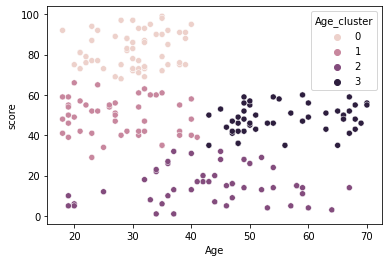

In [181]:
seaborn.scatterplot(x='Age',y="score",hue='Age_cluster', data=dataset)

In [182]:
dataset.Age_cluster.value_counts()


0    57
3    48
2    48
1    47
Name: Age_cluster, dtype: int64